In [26]:
%pip install -qq -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
import folium
from datasets_tourism import *

# Timeframe giugno - settembre 2023

In [28]:
START_DATE = "2023-06-01"
END_DATE = "2023-09-30 23:00"
SPECIFIC_DAY = "2023-06-29"

# Movimento turistico ufficiale in strutture ricettive Molveno (Giu-Sett 2023)

In [29]:
movimento_turistico_molveno = movimento_turistico_molveno_df[
    (movimento_turistico_molveno_df["date"] >= START_DATE) &
    (movimento_turistico_molveno_df["date"] <= END_DATE)
]
# movimento_turistico_molveno

<Axes: title={'center': 'Serie temporale delle presenze a Molveno'}, xlabel='date'>

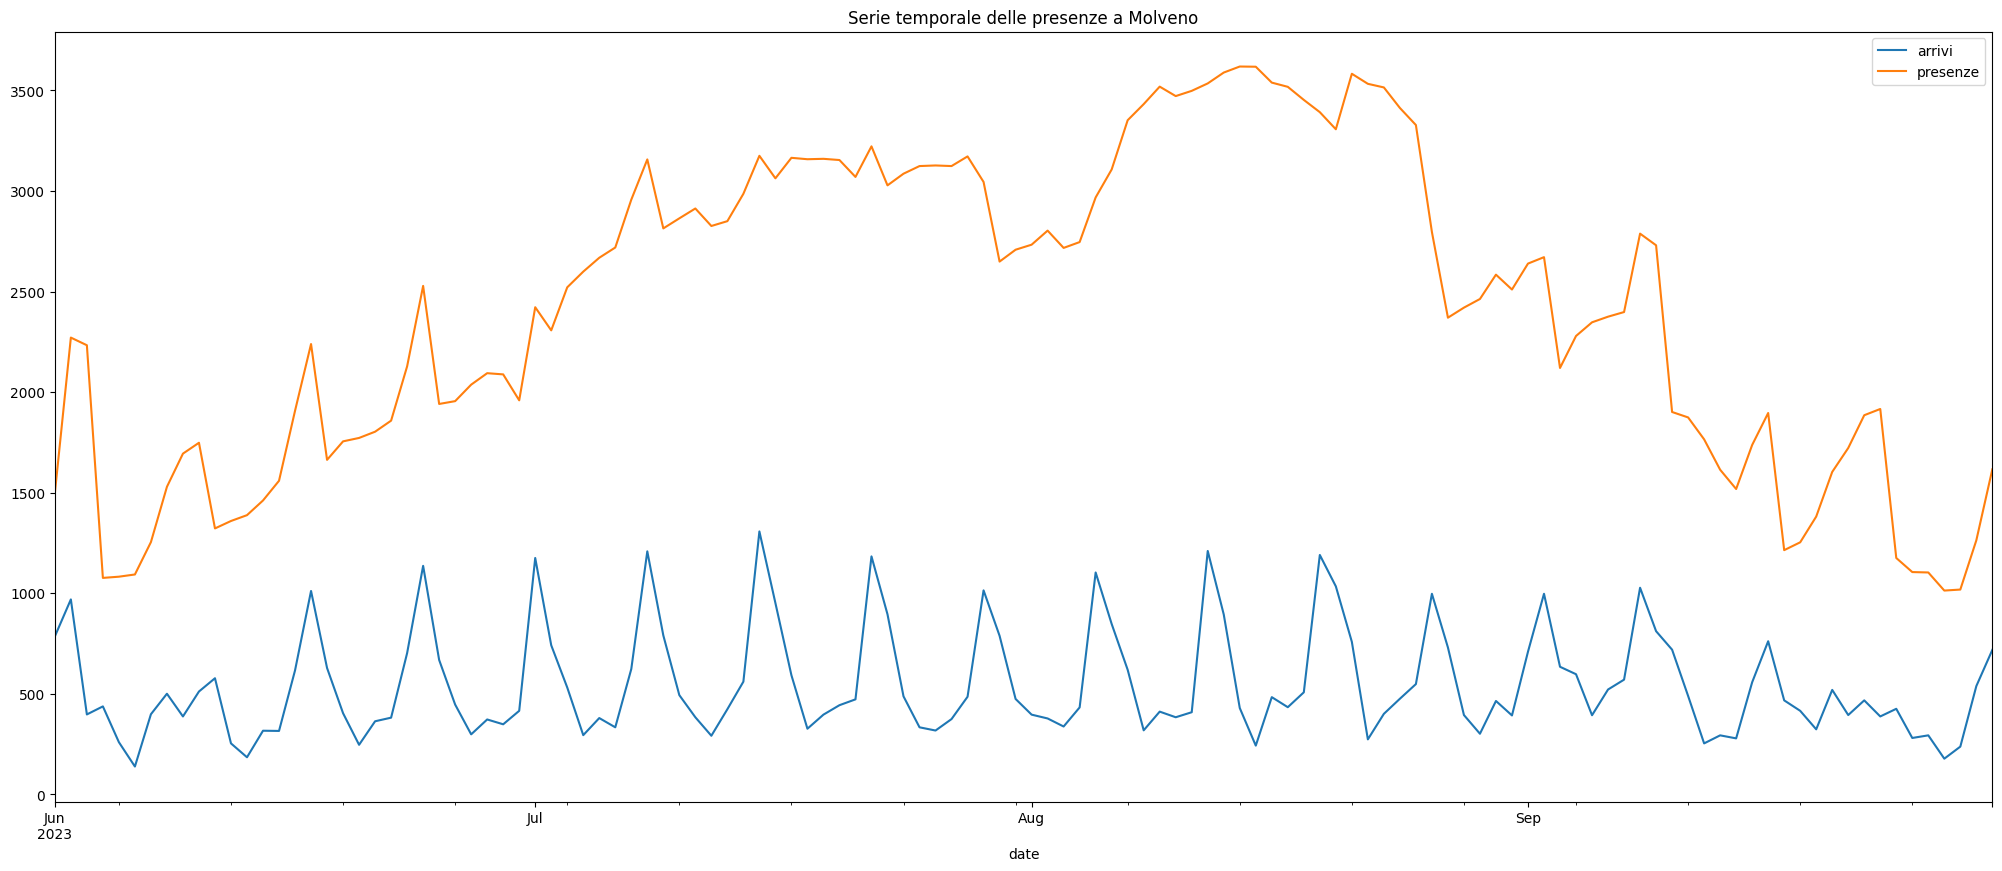

In [30]:
movimento_turistico_molveno.plot(figsize=(25, 10), x="date", y=["arrivi", "presenze"], title="Serie temporale delle presenze a Molveno")

# Dati Vodafone

**In vodafone data, first find the locId of locations that are relevant for the "Molveno" use case**
- LAGO_MOLV Lago di Molveno
- 27        Molveno
- 166       Andalo
- 105       Altopiano Paganella ecc..

In [31]:
# pd.options.display.max_rows = None
# vodafone_aree_df[["locDescr", "locId"]]
# pd.options.display.max_rows = 10

In [32]:
locId_LAGO_MOLVENO = "LAGO_MOLV"
locId_MOLVENO = "27"
locId_ANDALO = "166"
locID_ALTOPIANO_TUTTO = "105"

## Dati Vodafone Trentino (Giu-Sett 2023)

In [33]:
vodafone_trentino = vodafone_attendences_df[
    (vodafone_attendences_df["date"] >= START_DATE) &
    (vodafone_attendences_df["date"] <= END_DATE)
]
# vodafone_trentino

## Dati Vodafone per Lago di Molveno (Giu-Sett 2023)

In [34]:

vodafone_lagomolveno = vodafone_trentino [
    (vodafone_trentino["locId"] == locId_LAGO_MOLVENO)
]
# vodafone_lagomolveno

### grafico tutti gli utenti

<Axes: title={'center': 'Serie temporale dati Vodafone per Lago di Molveno'}, xlabel='date'>

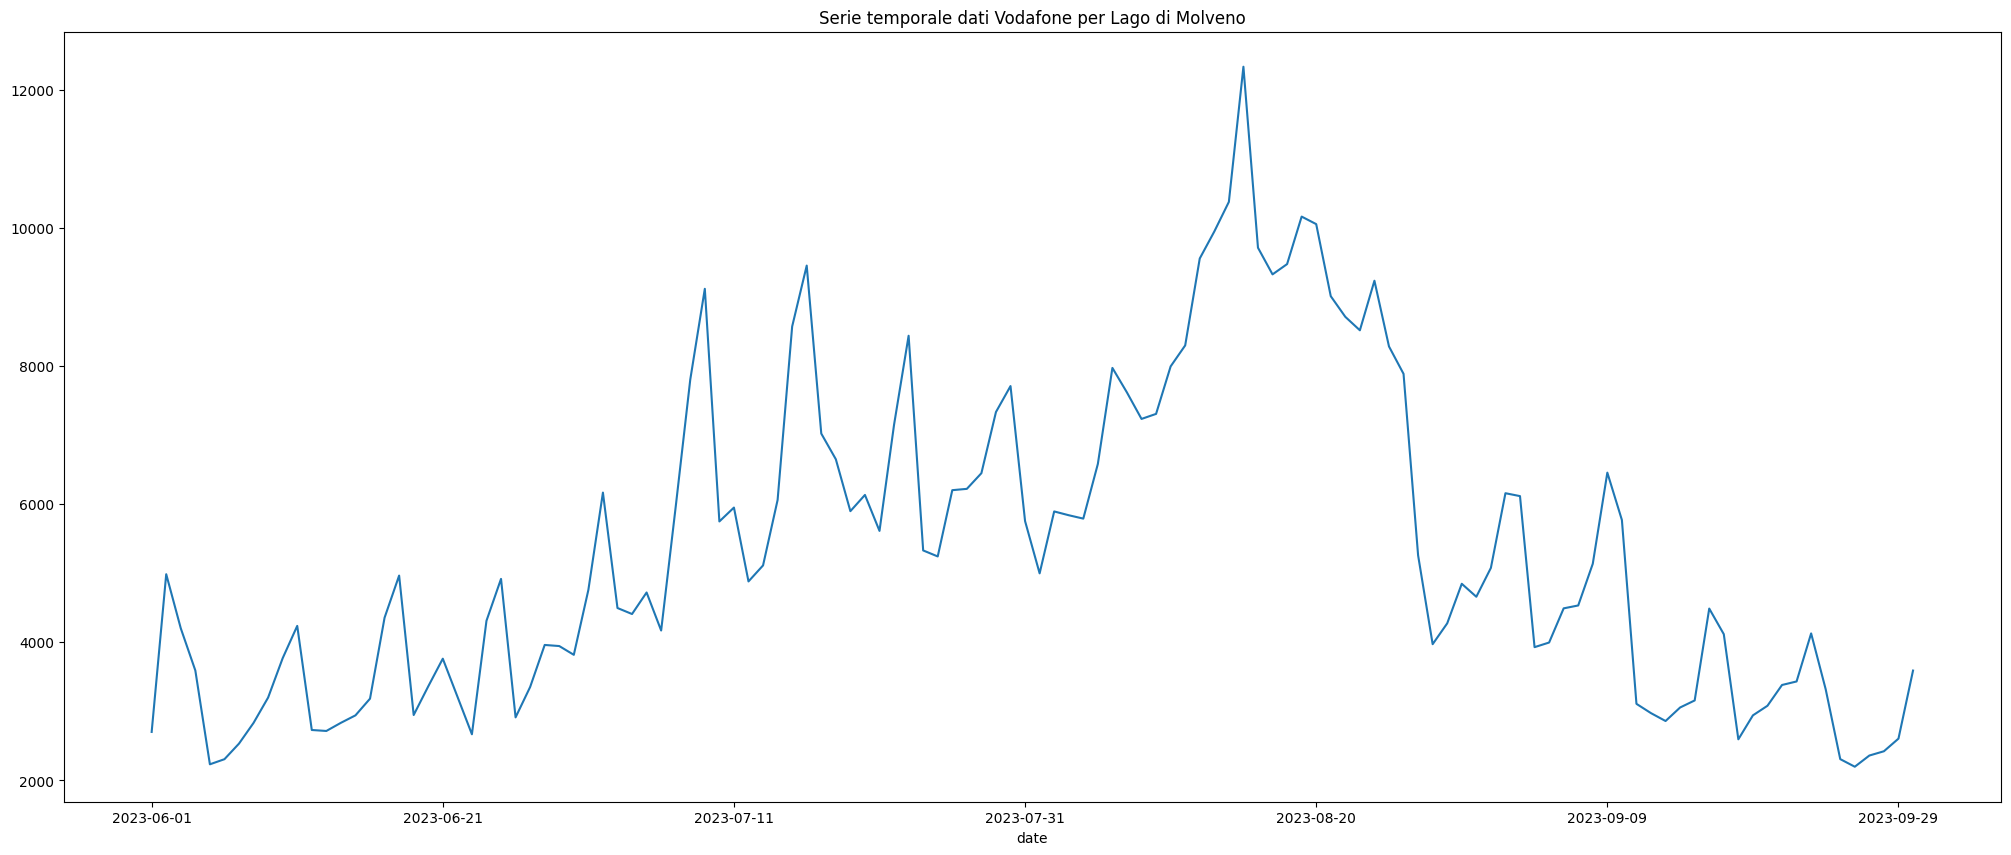

In [35]:
vodafone_lagomolveno.groupby(["date"])["value"].sum().plot(figsize=(25, 10), title="Serie temporale dati Vodafone per Lago di Molveno")

### grafico profili utente separati

<Axes: title={'center': 'Serie temporale dati Vodafone per Lago di Molveno, suddivisi per profilo utente'}, xlabel='date'>

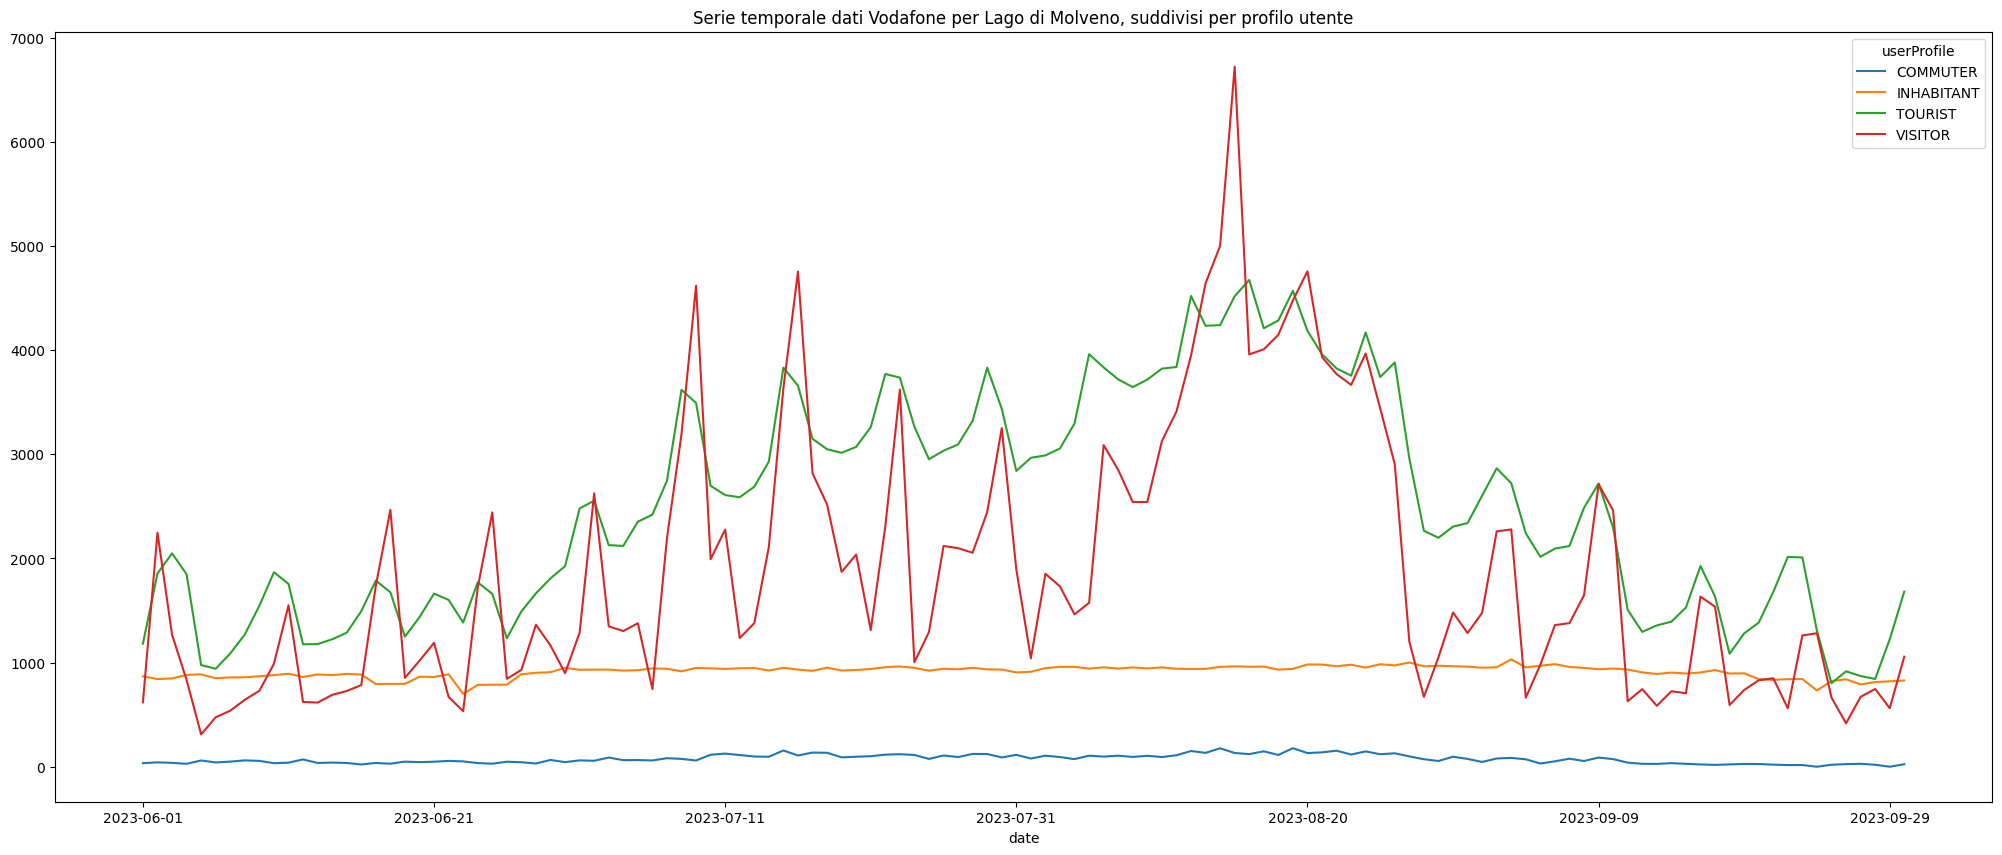

In [36]:
vodafone_lagomolveno.groupby(["date", "userProfile"])["value"].sum().unstack().plot(figsize=(25, 10), title="Serie temporale dati Vodafone per Lago di Molveno, suddivisi per profilo utente")

## Dati Vodafone per Molveno (Giu-Sett 2023)

In [37]:

vodafone_molveno = vodafone_trentino [
    (vodafone_trentino["locId"] == locId_MOLVENO)
]
# vodafone_molveno


### grafico tutti gli utenti

<Axes: title={'center': 'Serie temporale dati Vodafone per Molveno'}, xlabel='date'>

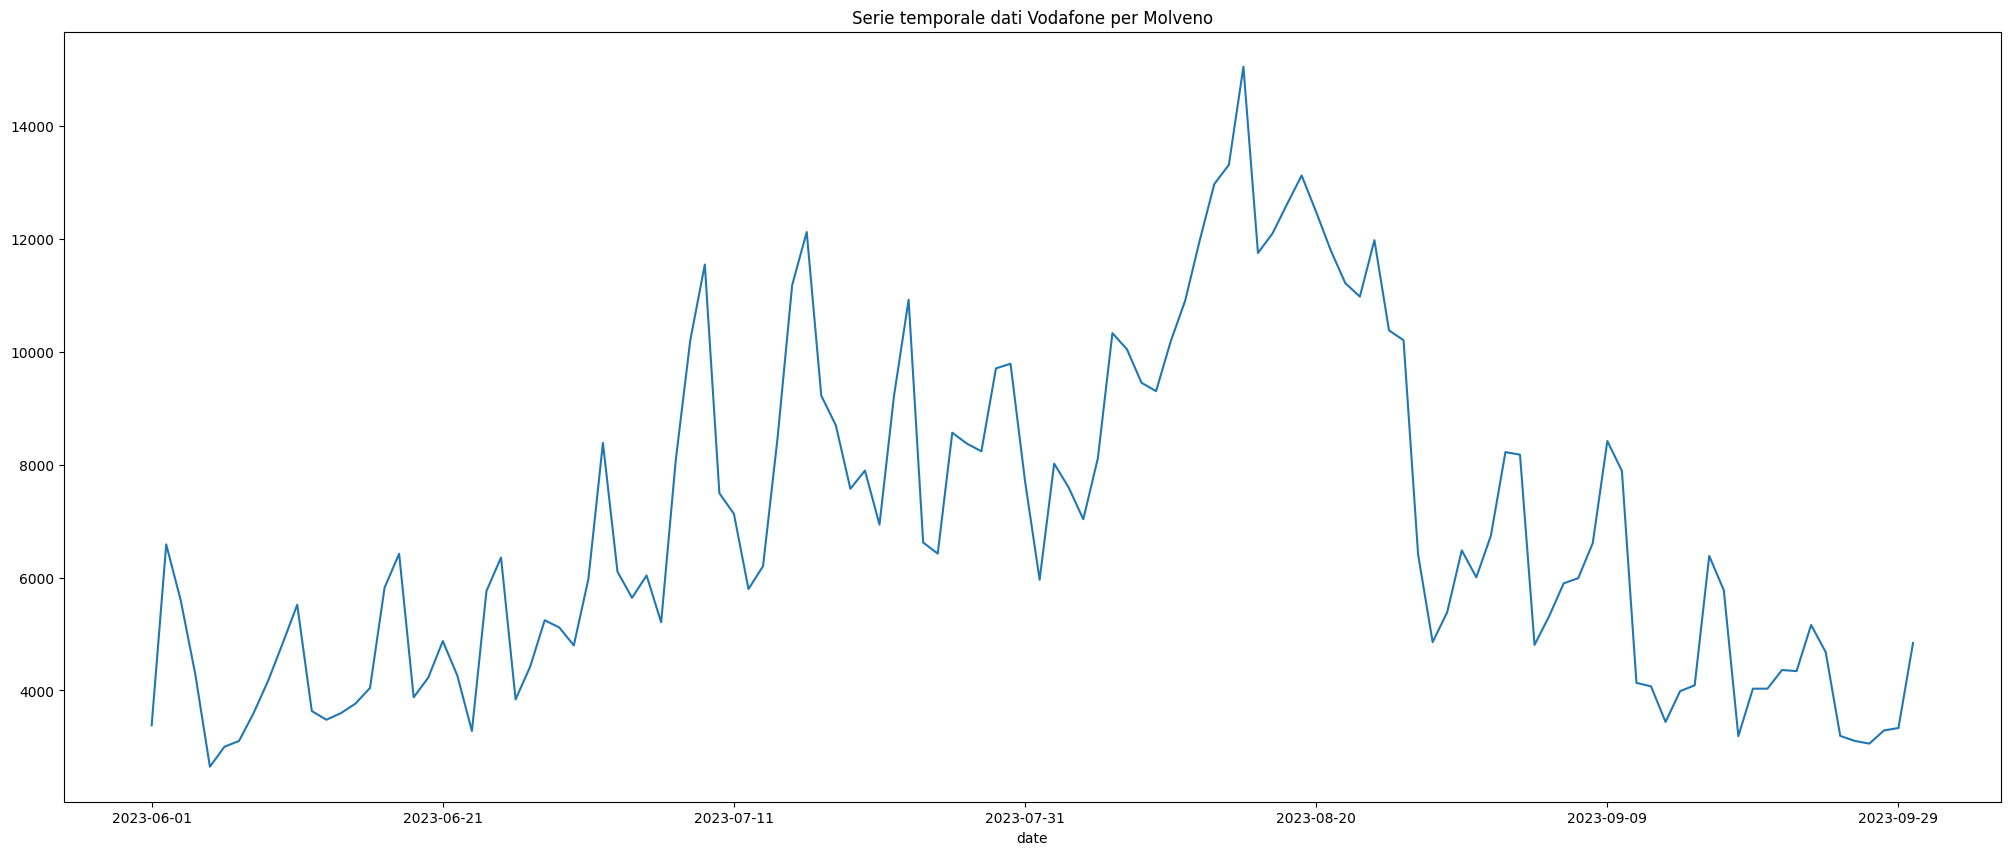

In [38]:
vodafone_molveno.groupby(["date"])["value"].sum().plot(figsize=(25, 10), title="Serie temporale dati Vodafone per Molveno")

### grafico profili utente separati

<Axes: title={'center': 'Serie temporale dati Vodafone per Molveno, suddivisi per profilo utente'}, xlabel='date'>

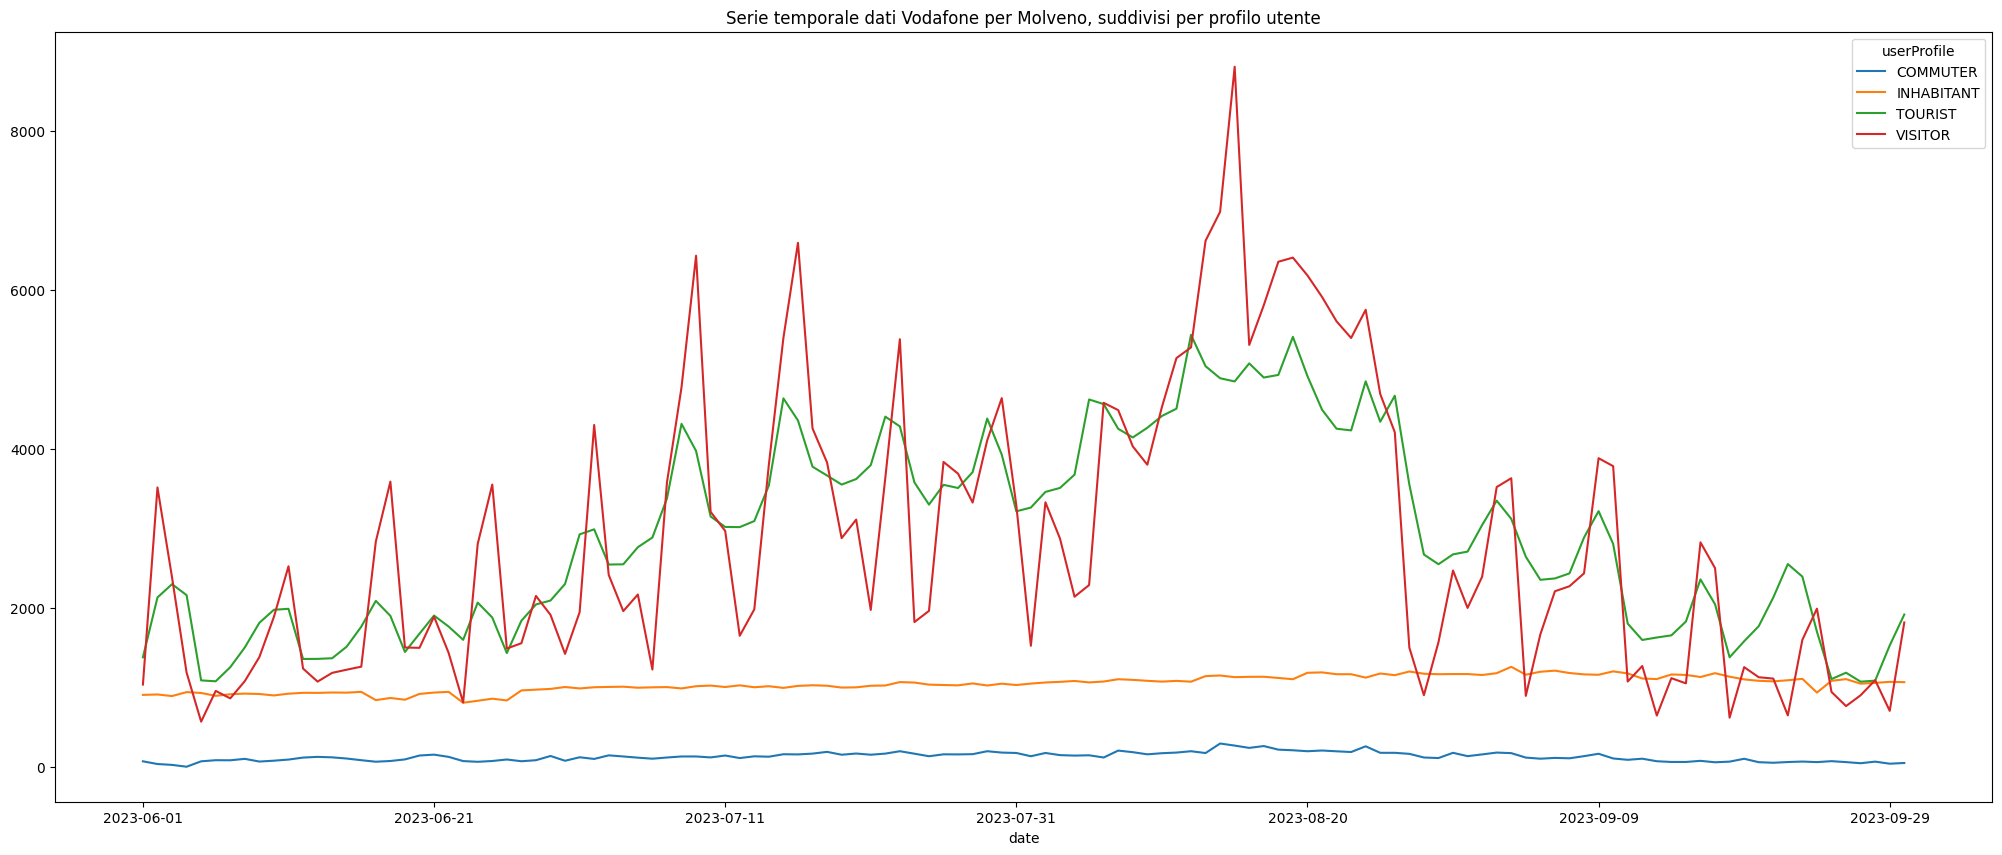

In [39]:
vodafone_molveno.groupby(["date", "userProfile"])["value"].sum().unstack().plot(figsize=(25, 10), title="Serie temporale dati Vodafone per Molveno, suddivisi per profilo utente")

## Dati Vodafone Andalo (Giu-Sett 2023)

Dati interessanti per comparare diverso fenomeno di tracciamento degli escurionisti

In [40]:
vodafone_andalo = vodafone_trentino [
    (vodafone_trentino["locId"] == locId_ANDALO)
]
# vodafone_andalo

<Axes: title={'center': 'Serie temporale dati Vodafone per Andalo, suddivisi per profilo utente'}, xlabel='date'>

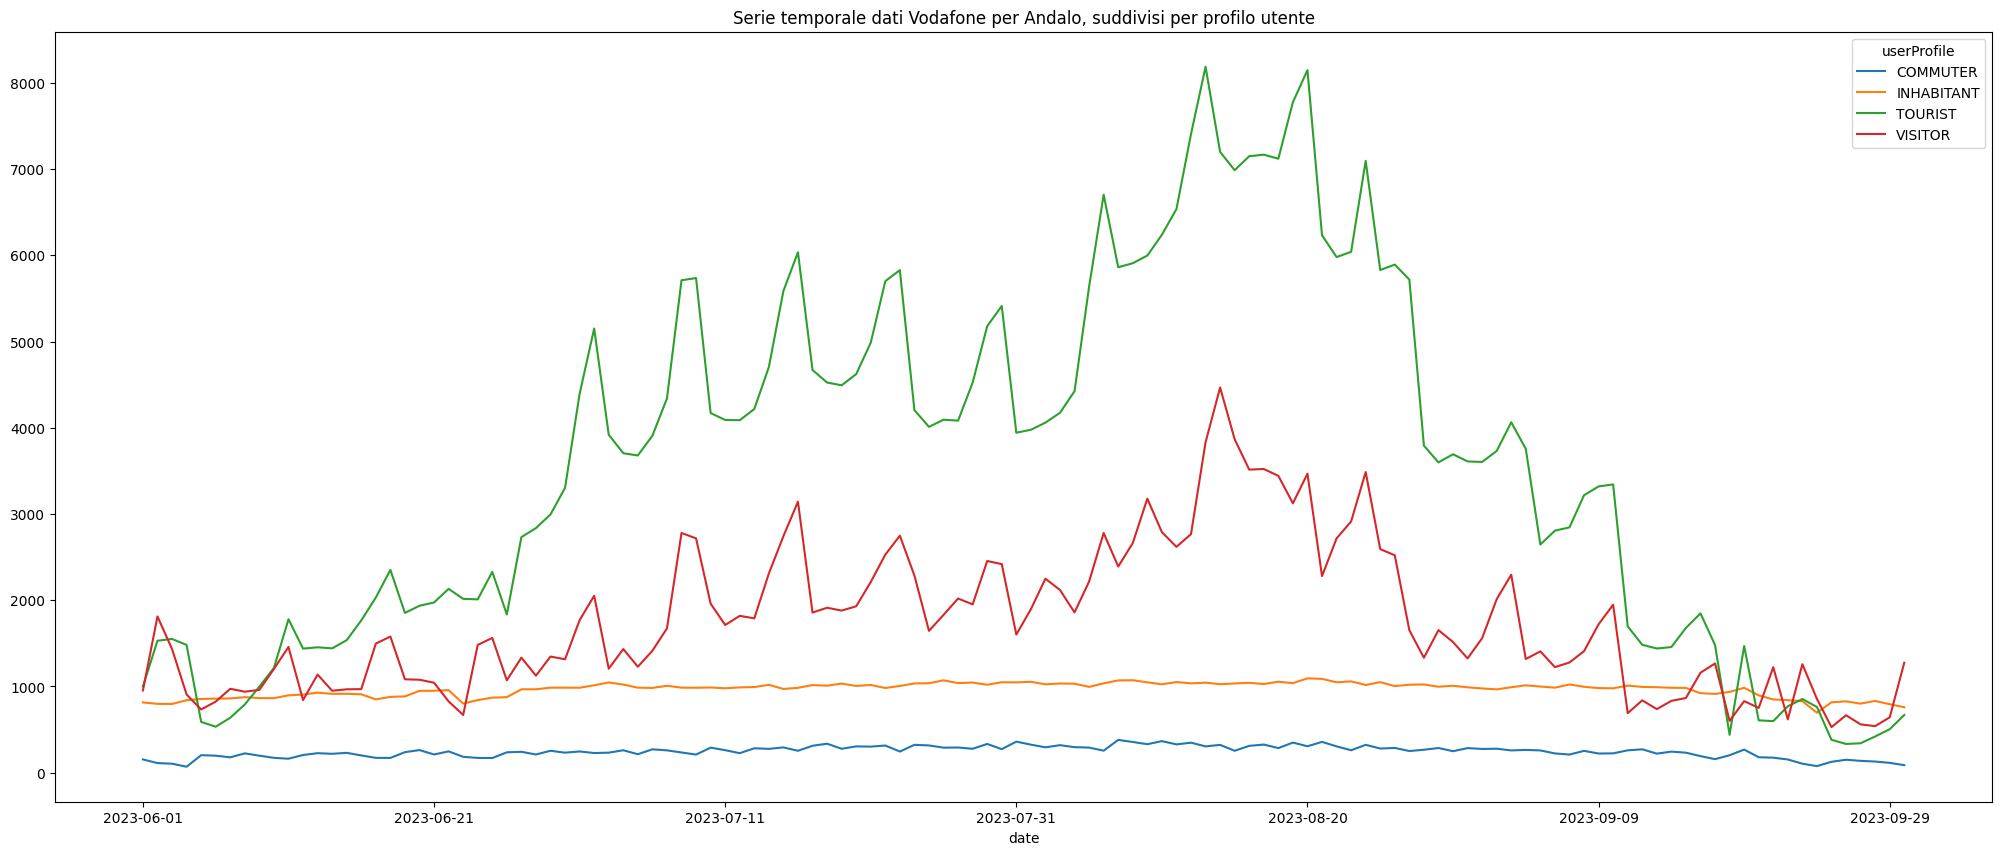

In [41]:
vodafone_andalo.groupby(["date", "userProfile"])["value"].sum().unstack().plot(figsize=(25, 10), title="Serie temporale dati Vodafone per Andalo, suddivisi per profilo utente")

# Comparazioni

## Comparazione dati Vodafone per profilo utente e dati presenze per Molveno

In [42]:
vodafone_molveno_sum = vodafone_molveno.groupby(["date"])["value"].sum().reset_index().rename(columns={'value':'vodafone_molveno'})
# vodafone_molveno_sum
presenze_molveno = movimento_turistico_molveno.reset_index()[["date", "presenze"]]
# presenze_molveno

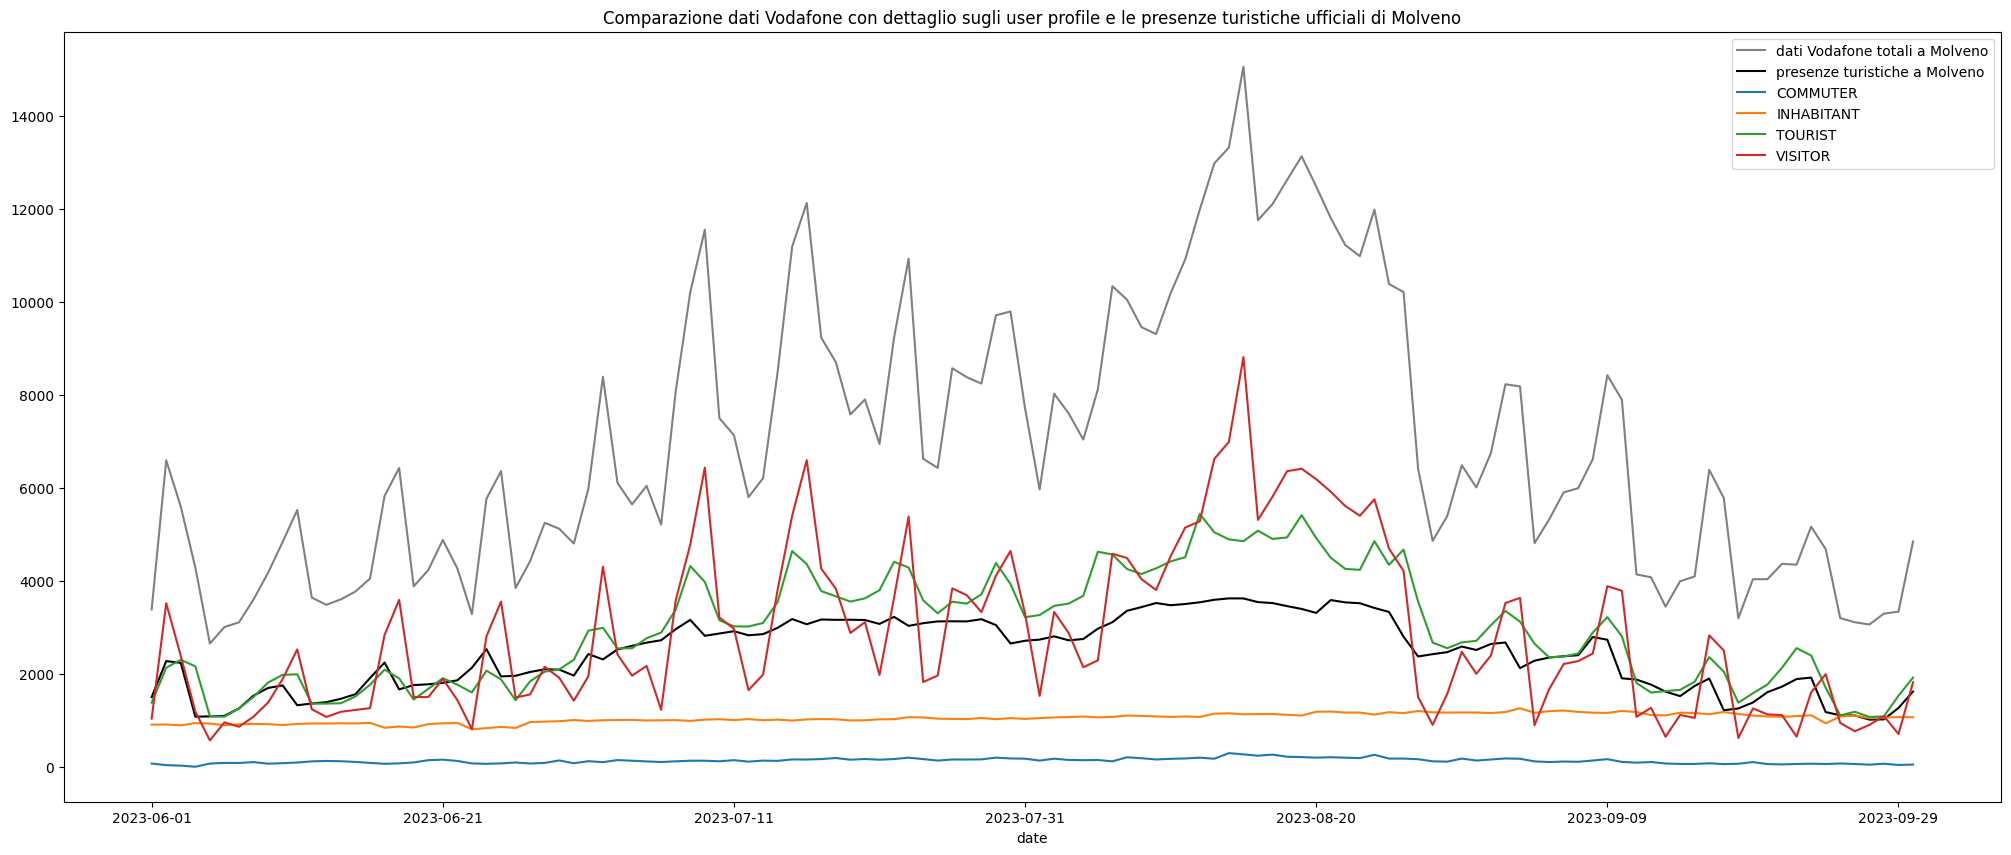

In [43]:
ax = None
ax = vodafone_molveno_sum['vodafone_molveno'].plot(figsize=(25, 10), label="dati Vodafone totali a Molveno", color='gray')
ax = presenze_molveno['presenze'].plot(ax=ax, x="date", y="presenze", label="presenze turistiche a Molveno", figsize=(25,10), color='black')
ax = vodafone_molveno.groupby(["date", "userProfile"])["value"].sum().unstack().plot(ax=ax, figsize=(25, 10), title="Comparazione dati Vodafone con dettaglio sugli user profile e le presenze turistiche ufficiali di Molveno")
ax.legend()

## Dettaglio comparazione dati Vodafone "turisti" e dati presenze Molveno

In [44]:
vodafone_molveno_turisti = vodafone_molveno[
    (vodafone_molveno["userProfile"] == "TOURIST")
]
vodafone_molveno_turisti_sum = vodafone_molveno_turisti.groupby(["date"])["value"].sum().reset_index().rename(columns={'value':'vodafone_turisti'})
# vodafone_molveno_turisti_sum

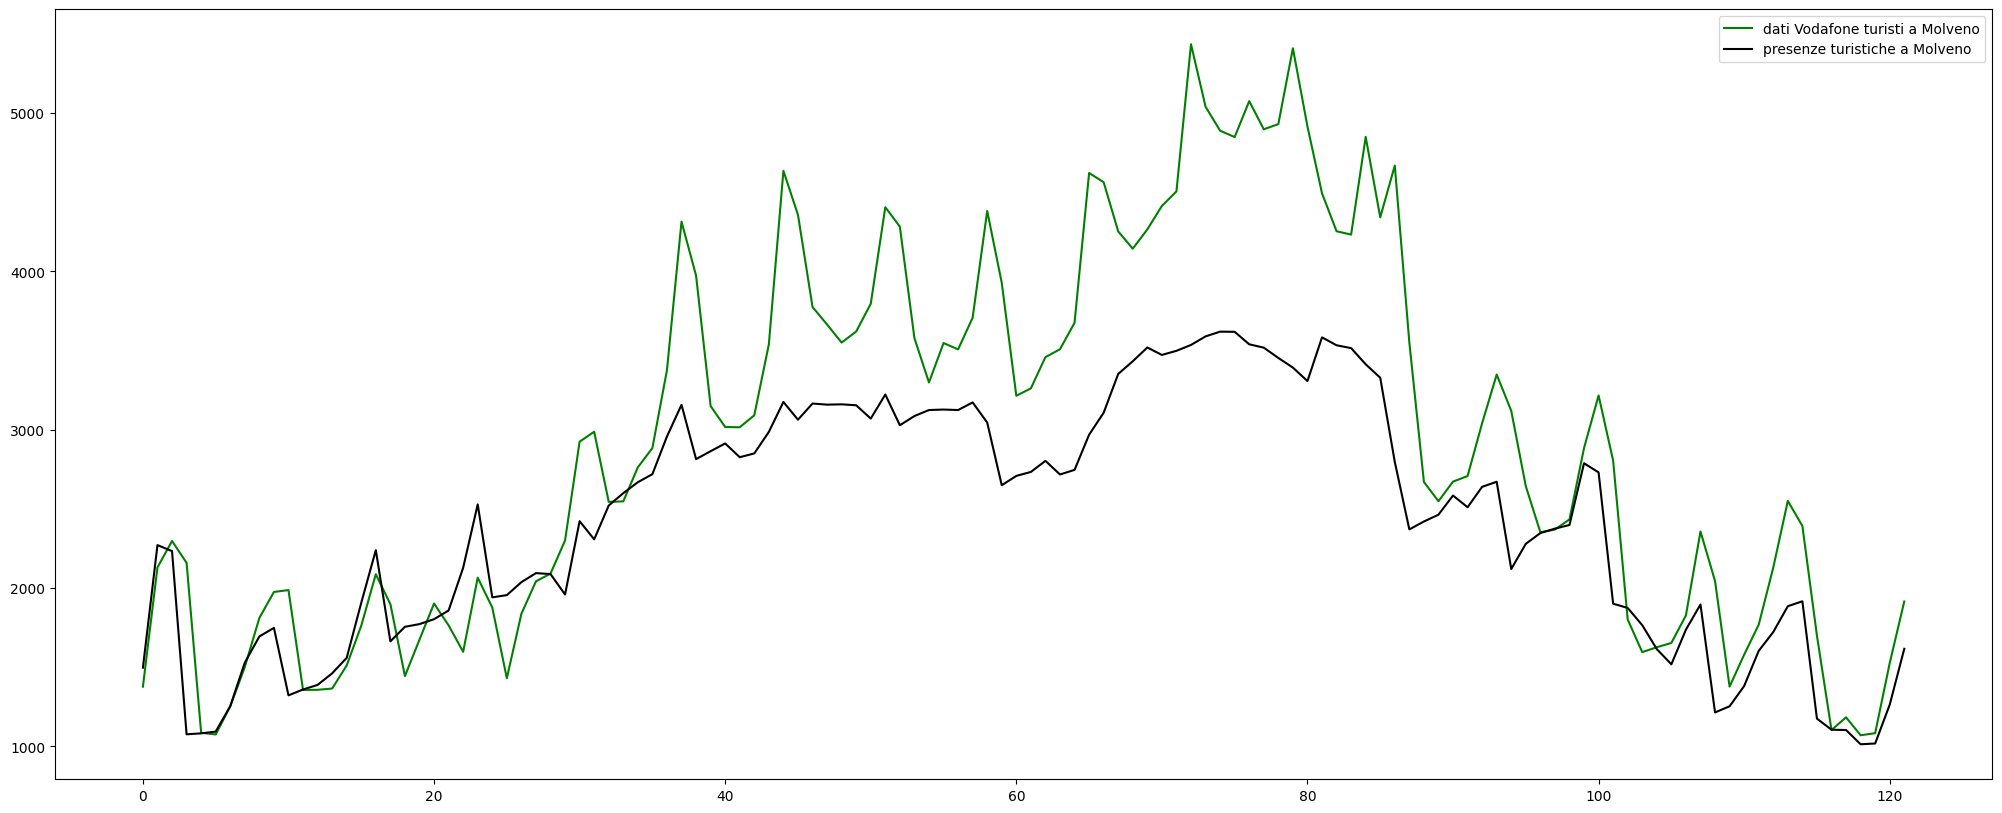

In [45]:
ax = None
ax = vodafone_molveno_turisti_sum['vodafone_turisti'].plot(figsize=(25, 10), label="dati Vodafone turisti a Molveno", color='green')
ax = presenze_molveno['presenze'].plot(ax=ax, x="date", y="presenze", label="presenze turistiche a Molveno", figsize=(25,10), color='black')
ax.legend()

Possibile spiegazione della divergenza dei dati Vodafone-TOURIST e presenze turistiche ufficiali per i mesi di luglio e agosto potrebbe essere (i) la presenza di turisti con seconda casa a Molveno (che non sono catturati dalla registrazione in strutture ricettive ufficiali) e (ii) la presenza di pernottamenti in strutture ricettive non convenzionali (airbnb).

### correlazione vodafone_turisti - presenze turistiche

In [46]:
all = pd.concat([vodafone_molveno_turisti_sum[['vodafone_turisti']],
                 presenze_molveno[['presenze']],
                ], axis=1)
# all

In [47]:
correlations = all.corr()
correlations
# correlations.style.background_gradient(cmap ='coolwarm') 

,vodafone_turisti,presenze
vodafone_turisti,1.00000,0.92813
presenze,0.92813,1.00000


### varie correlazioni

In [48]:
vodafone_molveno_visitor = vodafone_molveno[
    (vodafone_molveno["userProfile"] == "VISITOR")
]
vodafone_molveno_visitor_sum = vodafone_molveno_visitor.groupby(["date"])["value"].sum().reset_index().rename(columns={'value':'vodafone_visitor'})
# vodafone_molveno_visitor_sum

In [49]:
all = pd.concat([vodafone_molveno_sum['vodafone_molveno'],
                vodafone_molveno_turisti_sum[['vodafone_turisti']],
                vodafone_molveno_visitor_sum[['vodafone_visitor']],
                presenze_molveno[['presenze']],
                ], axis=1)
#all

In [50]:
correlations = all.corr()
correlations
correlations.style.background_gradient(axis=None, cmap ='coolwarm') 

,vodafone_molveno,vodafone_turisti,vodafone_visitor,presenze
vodafone_molveno,1.000000,0.949039,0.971985,0.872984
vodafone_turisti,0.949039,1.000000,0.850525,0.928130
vodafone_visitor,0.971985,0.850525,1.000000,0.778200
presenze,0.872984,0.928130,0.778200,1.000000
